# <span style="color:#8B0000;font-family:Papirus">Tarea 4</span>

### <span style="color:#8B0000;font-family:Papirus">Jhonny Lanzuisi</span>

1. Escribe una función de python que reciba como entrada un digrafo $d$ que sea un torneo. Si $d$ no es un torneo, la función debe mostrar un mensaje de error. Si $d$ es un torneo, la función debe mostrar un camino (dirigido) con todos los vértices de $d$, en forma de lista. 
2. Construye un digrafo cuyos vértices son las asignaturas de la Licenciatura en Matemáticas de la USB (0500) modalidad Seminario y dados vértices $x$, $y$, se tiene $x\to y$ si y sólo si $x$ es requisito de $y$. Asígnale a cada lado $xy$ el valor $1$, que indica la cantidad de trimestres que deben transcurrir para ir de la asignatura $x$ a la asignatura $y$. Calcula la cantidad mínima de trimestres necesarios para completar la carrera.

## Respuestas

### Primera pregunta.

El siguiente bloque de python define la función `path_from_tournament` que pide el ejercicio.
Luego, se define una función que genera un torneo al azar, que puede tener entre 0 y 20 nodos, para probar `path_from_tournament`.

In [28]:
def path_from_tournament(G):
    """
    Take a graph G and, if G is a tournament,
    return a path with all vertices. Otherwise,
    raise an error.
    """

    import networkx as nx

    # Raise error if G is not a Tournament.
    if (not(nx.algorithms.tournament.is_tournament(G))):
        class GraphError(Exception):
            print("Graph is not a tournament")
        raise GraphError

    # Print a path with all vertices of G.
    # This path always exists because G is a tournament.
    print(nx.algorithms.tournament.hamiltonian_path(G))

In [29]:
def test_path_from_tournament():
    import networkx as nx
    import matplotlib.pyplot as plt
    import random

    lowerbound = 2
    upperbound = 20

    # Amount of nodes
    vertices = random.randint(lowerbound, upperbound)

    # Random tournament G
    G = nx.algorithms.tournament.random_tournament(vertices)
    nx.draw(G, with_labels=True)
    
    # Find path
    path_from_tournament(G)

[2, 0, 1, 3, 5, 8, 9, 14, 6, 4, 7, 10, 11, 13, 12]


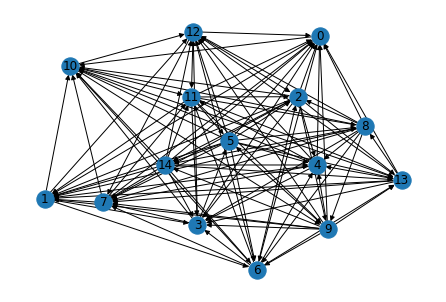

In [30]:
test_path_from_tournament()

### Segunda pregunta

La función `math_pensum_digraph` crea el digrafo. Hace falta `pygraphviz` para que el
digrafo quede igual que el PDF, si se cambia este layout (en la variable `pos`) por `spring`, por ejemplo,
se puede compilar sin esta dependencia pero no se verá igual.

El digrafo asume que los estudios generales no se prelan entre si,
como tampoco las electivas y los seminarios. Es decir, se considera que todas podrían inscribirse
en un mismo trimestre.

Bajo estas hipótesis es suficiente con calcular la cantidad de trimistres
mínima con la que se puede cursar la componente principal (la mas grande) del digrafo.
Esto es debido a que cualquier otra componente puede cursarse al mismo tiempo,
pues no depende de ninguna asignatura en la componente principal,
pero al ser más pequeña se terminará antes que al componente principal
y no afectará al tiempo mínimo.

Como además el digrafo tiene forma de un árbol con raíz, podemos simplemente
contar la cantidad de pisos, para obtener un total de 13 trimestres.



In [27]:
def math_pensum_digraph():
    """
    Draws and saves to PDF a digraph of the
    courses in the mathematics degree at SBU.
    """

    import networkx as nx
    import matplotlib.pyplot as plt

    edges = [
        ("Mate I", "Mate II"),
        ("Mate I", "Física I"),
        ("Inglés I", "Inglés II"),
        ("Lenguaje I", "Lenguaje II"),
        ("Sociales I", "Sociales II"),
        ("Mate II", "Mate III"),
        ("Mate II", "Física II"),
        ("Física I", "Física II"),
        ("Inglés II", "Inglés III"),
        ("Lenguaje II", "Lenguaje III"),
        ("Sociales II", "Sociales III"),
        ("Mate III", "Álgebra I"),
        ("Mate III", "Cálculo I"),
        ("Mate III", "Geometría I"),
        ("Inglés III", "Inglés\npara\nmatemáticos I"),
        ("Álgebra I", "Álgebra II"),
        ("Cálculo I", "Cálculo II"),
        ("Geometría I", "Geometría II"),
        ("Inglés\npara\nmatemáticos I", "Inglés\npara\nmatemáticos II"),
        ("Álgebra II", "Álgebra III"),
        ("Cálculo II", "Cálculo III"),
        ("Geometría II", "Geometría III"),
        ("Inglés\npara\nmatemáticos II", "Inglés\npara\nmatemáticos III"),
        ("Álgebra III", "Intro.\nTeo.\nGrupos"),
        ("Álgebra III", "Mat.\nDiscretas"),
        ("Cálculo III", "Análisis I"),
        ("Intro.\nTeo.\nGrupos", "Intro.\nTeo.\nAnillos"),
        ("Análisis I", "Análisis II"),
        ("Análisis I", "Topología I"),
        ("Mat.\nDiscretas", "Combinatoria"),
        ("Mat.\nDiscretas", "Intro.\nProbabilidades"),
        ("Mat.\nDiscretas", "Algoritmos I"),
        ("Análisis II", "Análisis III"),
        ("Topología I", "Ec.\nDiferenciales I"),
        ("Intro.\nProbabilidades", "Intro.\nProcesos\nEstocásticos"),
        ("Análisis III", "Análisis IV"),
        ("Análisis III", "Ec.\nDiferenciales I"),
        ("Intro.\nProcesos\nEstocásticos", "Elect.\nProbabilidad\nEstadística"),
        ("Análisis IV", "Análisis V"),
        ("Ec.\nDiferenciales I", "Topología II"),
        ("Algoritmos I", "Algoritmos II"),
        ("Análisis V", "Análisis VI"),
        ("Combinatoria", "Elect.\nMat. Discretas"),
        ("Análisis VI", "Ec.\nDiferenciales II"),
        ("Topología II", "Ec.\nDiferenciales II"),
    ]

    nodes = [
        "Geometría",
        "Estudio\nGeneral 1",
        "Estudio\nGeneral 2",
        "Estudio\nGeneral 3",
        "Estudio\nGeneral 4",
        "Estudio\nGeneral 5",
        "Estudio\nGeneral 6",
        "Electiva\nMatemática 1",
        "Electiva\nMatemática 2",
        "Electiva\nAfín",
        "Seminario 1",
        "Seminario 2"
    ]

    G = nx.DiGraph()

    G.add_edges_from(edges, weight=1)
    G.add_nodes_from(nodes)

    edgelabels = nx.get_edge_attributes(G,'weight')

    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

    plt.figure(figsize=(24,24))
    nx.draw(G, pos=pos, with_labels=True, node_color='white', verticalalignment='center', node_size=5000)
    nx.draw_networkx_edge_labels(G, pos, edgelabels)
    
    plt.savefig('graph.pdf')
    


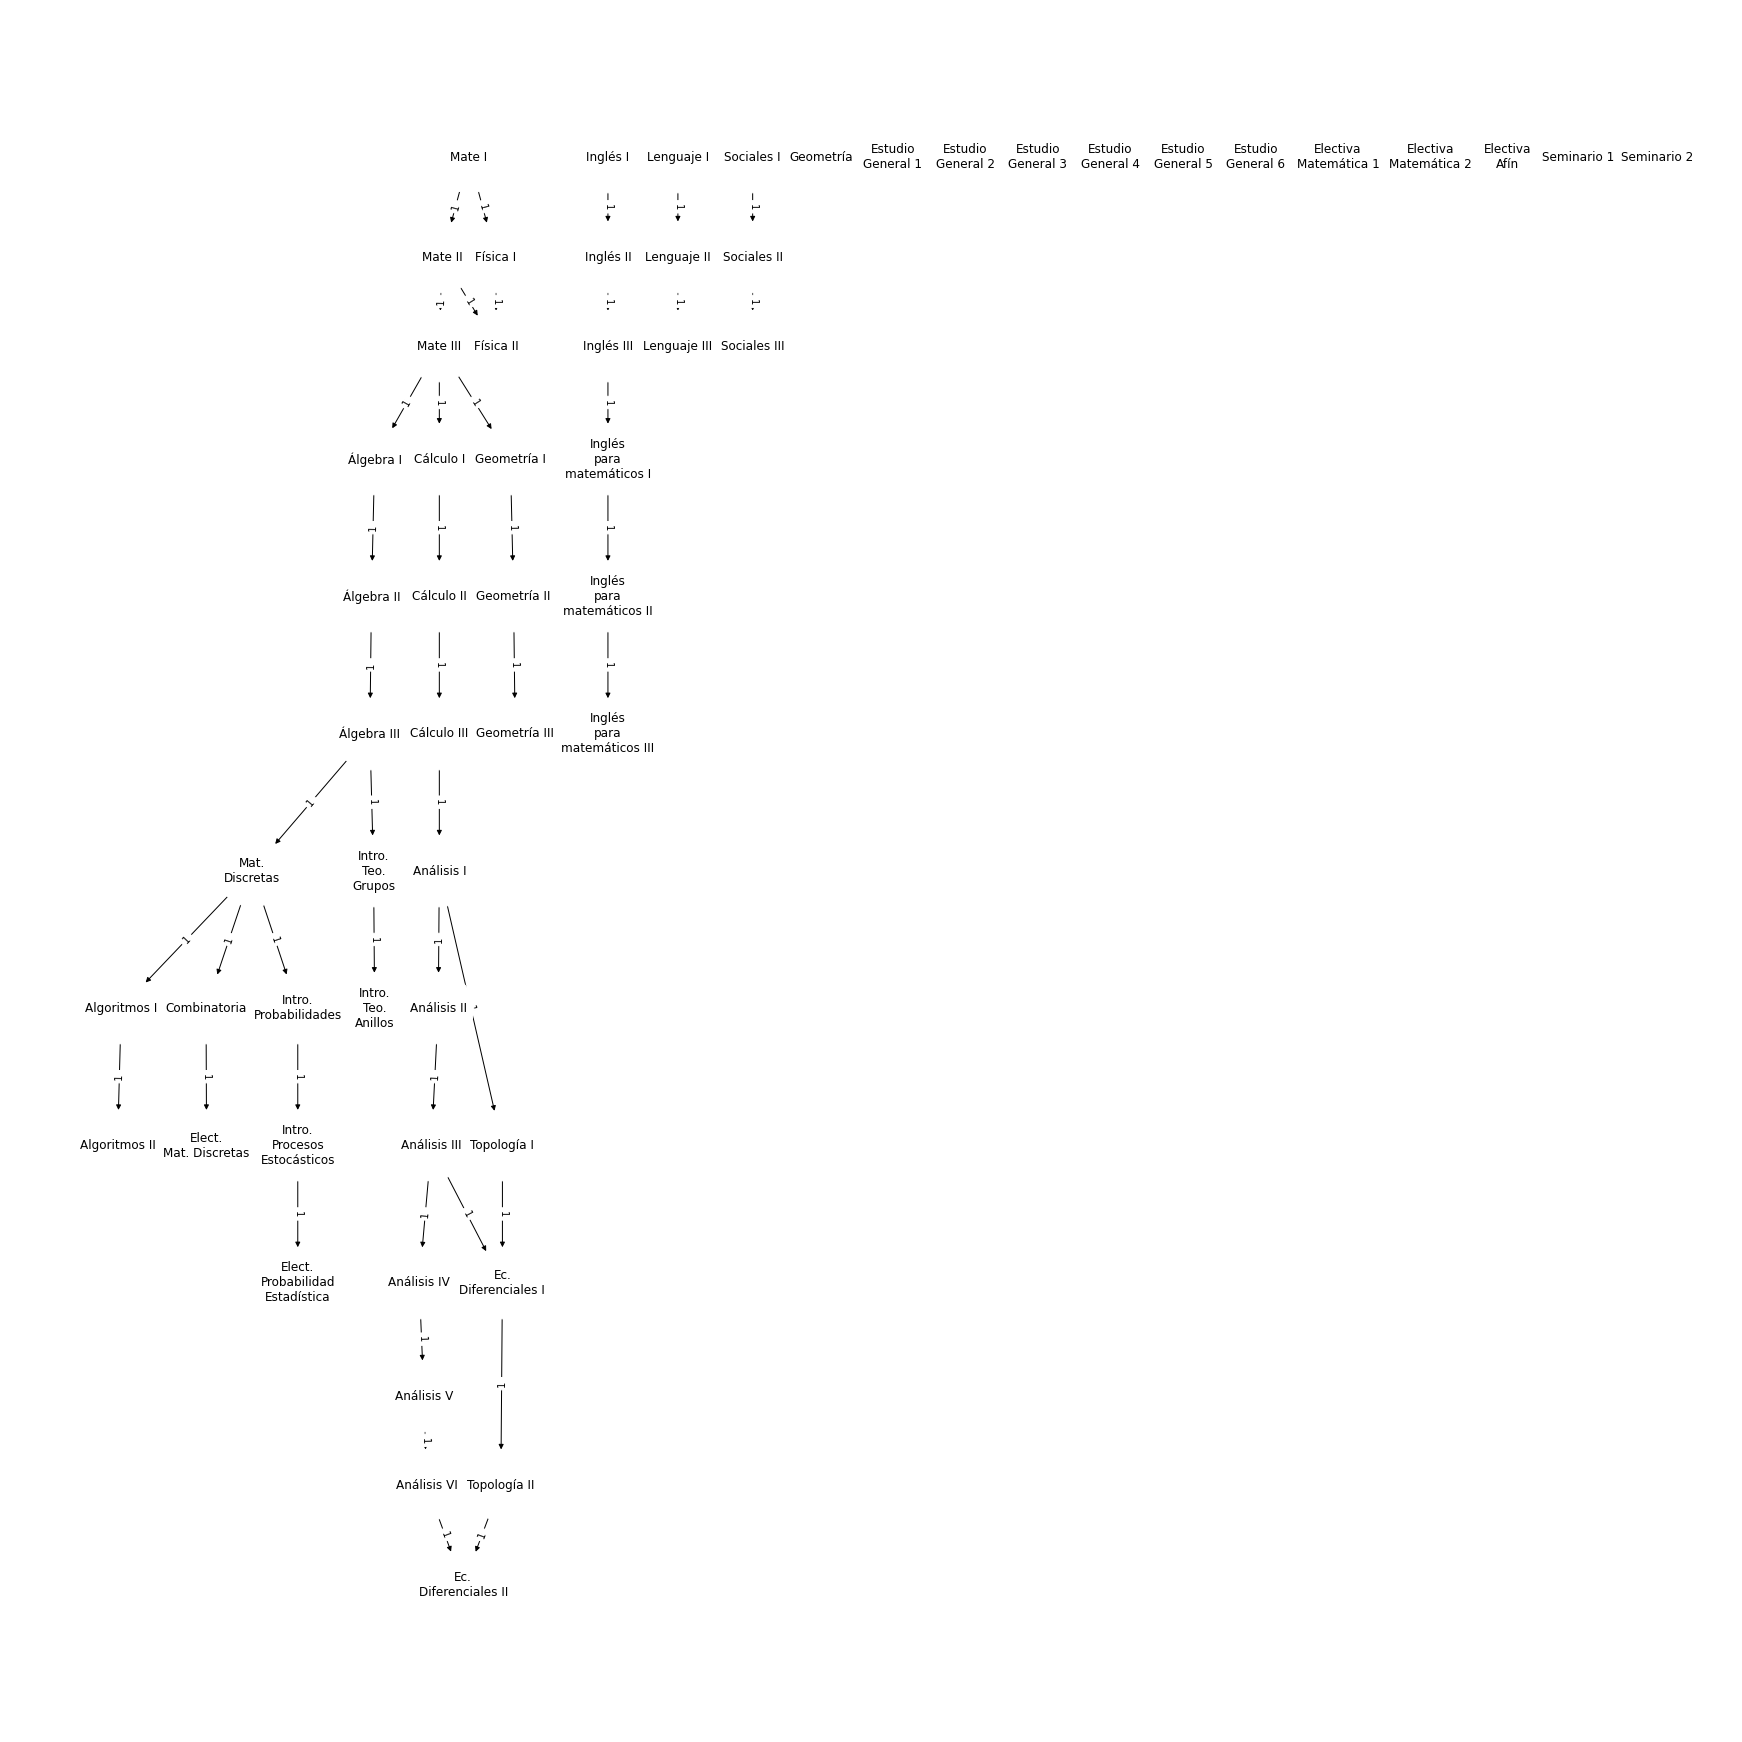

In [26]:
math_pensum_digraph()